In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [50]:
df = pd.read_csv('https://assets.datacamp.com/production/course_6078/datasets/gm_2008_region.csv')

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [51]:
df["Region"] = df["Region"].astype('category').cat.codes

In [52]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,3
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,5
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,2
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1


In [53]:
y = df['life'].values.reshape(-1,1)
X_fertility = df['fertility'].values.reshape(-1,1)

In [54]:
X = df.drop('life', axis=1).values

In [55]:
X_fertility[3:7]

array([[1.4 ],
       [1.96],
       [1.41],
       [1.99]])

In [56]:
reg = LinearRegression()
reg.fit(X_fertility, y)
reg.score(X_fertility, y) # R^2

0.6192442167740035

In [57]:
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)
y_pred = reg.predict(prediction_space)

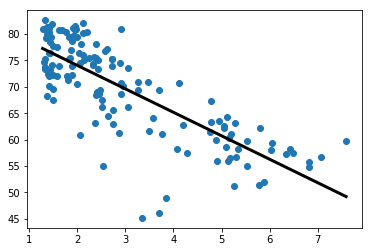

In [58]:
plt.scatter(X_fertility, y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [60]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [61]:
# R^2 and RMSE
reg_all.score(X_test, y_test), np.sqrt(mean_squared_error(y_test, y_pred))

(0.8376147251418641, 3.2519310654114766)

### CV


In [62]:
from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg_all, X, y, cv=5)
cv_scores

array([0.81152772, 0.82723008, 0.90453285, 0.8085304 , 0.94433861])

In [63]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.8592319317594075


### Regularization

__Ridge regression:__

Loss = OLS loss function + $a \sum a_i^2$

$a$ controls model complexity

- $a=0$ we get OLS, can lead to overfitting 
- high $a$ can lead to underfitting

__LASSO regression:__

Loss = OLS loss function + $a \sum |a_i|$

- shrinks the coefficients of less important features to exactly 0

In [72]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.2, normalize=True)
lasso.fit(X,y,)

lasso_coef = lasso.coef_
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00, -2.41020341e-01,  0.00000000e+00,
        0.00000000e+00,  2.27201640e-05, -5.56608347e-02, -1.05094017e-01,
       -0.00000000e+00])

In [73]:
df.drop('life', axis=1).columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality', 'Region'],
      dtype='object')

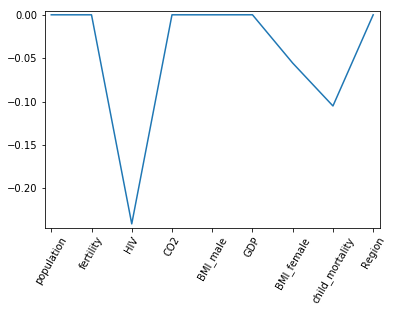

In [74]:
plt.plot(range(len(lasso_coef)), lasso_coef)
plt.xticks(range(len(lasso_coef)), df.drop('life', axis=1).columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [75]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    std_error = cv_scores_std / np.sqrt(10)
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

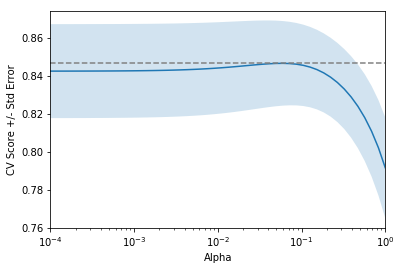

In [76]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)